# Práctica 7 - Entrenando un detector

### Contenidos

[Anotación de imágenes](#anotación-de-imágenes)  
[Entrenamiento](#entrenamiento) 

### Introducción 

En esta práctica se propone el entrenamiento del YOLOv7 con el fin de detectar objetos de interés del estudiante. En nuestro caso, aprovechando el motivo de la celabración del mundial de Qatar 2022, hemos propuesto un detector capaz de distinguir los suguientes elementos propios de un partido de fútbol:

- Football (balón de fútbol) - 0
- Player (jugador) - 1
- Referee (arbitro) -2

### Anotación de imágenes

Para el entrenamiento personalizado del detector es necesario las imágenes donde aparecen los objetos de interés y las etiquetas de estos, que se tratarán de archivos con formato ".txt" con el mismo nombre que la archivo de la imagen a la que referencian. En estos últimos se especifican las coordenadas de los recuadros en los que están contenidos los objetos a detectar así como la clase del objeto.

En nuestro caso, se ha accedido a un conjunto de datos en el servicio en la nube [Roboflow](https://roboflow.com). En concreto, se ha utilizado el dataset del proyecto subido en Roboflow llamado "[futbol players Computer Vision Project](https://universe.roboflow.com/roboflow-100/soccer-players-5fuqs)". Al descargar el conjunto de imágenes, estas vienen divididas en tres carpetas las cuales, cada una de ellas contiene una carpeta con las imágenes y otra con los etiquetados. Estas tres carpetas se corresponden a imágenes de entrenamiento (con las que se entrenan los modelos), de validación (con las que se selecciona el mejor de los modelos entrenados) y de test (error real cometido con un modelo seleccionado). 
Partiendo del anterior dataset, se ha creado un workspace en Roboflow al que se han subido las imágenes con el objetivo de escalarlas a un tamaño de 398x224 y añadir más imágenes de entrenamiento a nuestro conjunto de datos. En nuestro caso, se ha jugado con el brillo y la saturación de las imágenes existentes.

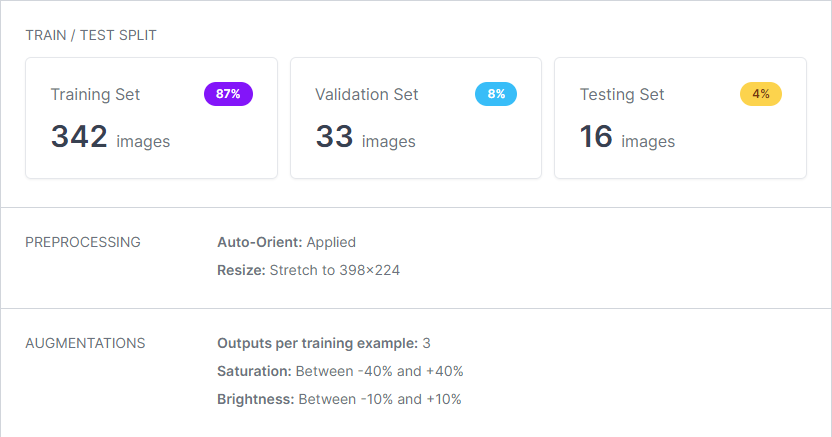

En la anterior imágen sacada del workspace creado anteriormente muestra un resumen del conjunto de datos que se utilizará para el entrenamiento del detector "yolov7". Podrá acceder al workspace donde se encuentran las imágenes del dataset por el siguiente [enlace](https://universe.roboflow.com/test-tatu8/football-detector), habiendo usado la versión 2 para el entrenamiento.

### Entrenamiento

Para el entrenamiento de detector, ejecutaremos el Anaconda Prompt y se activará el environment yolov7 creado en anteriores prácticas. Una vez activado, nos situaremos en la carpeta de yolov7 dentro del proyecto e incluiremos el archivo "data.yaml", que contiene la ruta relativa de los directorios con las imágenes y las clases a detectar y el cual ha sido generado por Roboflow, dentro de "./yolov7/data". Tras esto, se modificará el archivo "./yolov7/cfg/training/yolov7.yaml", el cual contiene la configuración de entrenamiento del yolov7, poniendo la variable "nc" a 3, pues se tienen 3 clases. Teniendo configurado lo anterior, se pasará a ejecutar el siguiente comando, el cual ejecuta el entrenamiento del "yolov7":

```
python train.py --workers 1 --device 0 --batch-size 8 --data data/data.yaml --img 398 224 --cfg cfg/training/yolov7.yaml --weights 'yolov7.pt' --name soccer --hyp data/hyp.scratch.custom.yaml --epochs 300
```
En el anterior comando se especifica que el entrenamiento constará con 300 épocas (--epochs 300) y con un batch-size de 8 (--batch-size 8). Para el entrenamiento, se ha utilizado un targeta gráfica NVIDIA RTX 2070 Super, para lo que se ha instalado CUDA previamente. 

### Resultados

Una vez finalizado el entrenamiento, en la carpeta "./yolov7/runs/train/soccer" tendremos, por una parte una carpeta llamada "weights" con los pesos utilizados en diversas épocas destacando "best.pt", que contiene los pesos de la época de mejor resultado; y por otra parte, resúmenes y resultados del entrenamiento donde destaca la matriz de confusión:

<img src=./yolov7/runs/train/soccer/confusion_matrix.png width=900>

Se ha probado el detector con 3 imágenes distintas y con un vídeo, utilizando los pesos de "./yolov7/runs/train/soccer/weights/best.pt". Las detecciones se pueden encontrar en "./yolov7/runs/detect"

Imágenes:

```
python detect.py --weights runs/train/soccer/weights/best.pt --source ../goles --conf 0.6
```

Vídeo:

```
python detect.py --weights runs/train/soccer/weights/best.pt --source ../test1Trim.mp4 --conf 0.6
```

In [11]:
import cv2
import os
import matplotlib.pyplot as plt

input_images_path = "./images_detect"

files_names = os.listdir(input_images_path)

for file_name in files_names:
    image_path = input_images_path + "/" + file_name
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (int(image.shape[1])*3, int(image.shape[0])*3), cv2.INTER_NEAREST)
    plt.xticks([]), plt.yticks([])
    plt.imshow(image)
    plt.show()

: 